In [ ]:
# EACL 2026 Abjad NLP:  Exploratory Data Analysis
# Medical Text Classification in Arabic

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("EACL 2026 ABJAD NLP - EXPLORATORY DATA ANALYSIS")
print("="*80)

EACL 2026 ABJAD NLP - EXPLORATORY DATA ANALYSIS


In [ ]:
# 1. LOAD DATA

print("\n[1/8] Loading training data...")
# Update path to your training data
train_df = pd.read_csv('/kaggle/input/arabic/shared_task_train.csv')

print(f"\n✅ Data loaded successfully!")
print(f"   Shape: {train_df.shape}")
print(f"   Columns: {train_df.columns.tolist()}")


[1/8] Loading training data...

✅ Data loaded successfully!
   Shape: (27951, 3)
   Columns: ['text', 'category', 'label']


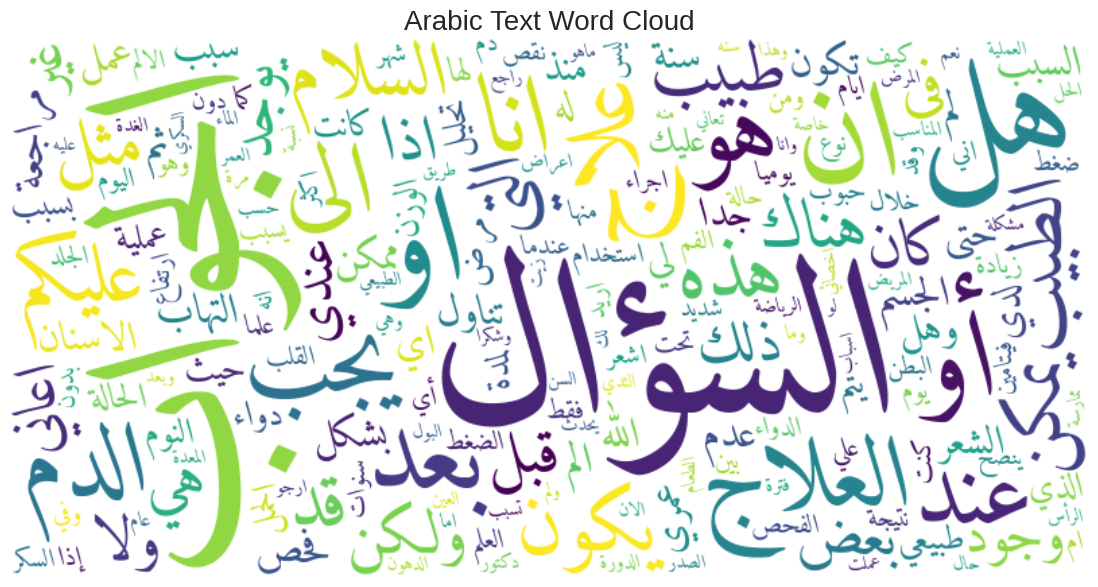

In [25]:
# Install wordcloud if not installed
!pip install -q wordcloud matplotlib

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Combine all text
all_text = " ".join(train_df['text'].astype(str))

# Optional: Add some Arabic stopwords if needed
arabic_stopwords = set([
    'في', 'من', 'على', 'و', 'إلى', 'عن', 'أن', 'مع', 'لا', 'ما', 'هذا', 'لكن', 'كل'
])
stopwords = STOPWORDS.union(arabic_stopwords)

# Generate WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    font_path='/kaggle/input/amiri-arabic/Amiri-Italic.ttf',  # Use an Arabic font if available
    collocations=False
).generate(all_text)

# Plot
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Arabic Text Word Cloud", fontsize=20)
plt.show()

In [ ]:
# 2. BASIC INFORMATION

print("\n[2/8] Basic Dataset Information...")
print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)

print(f"\nDataset Shape: {train_df.shape[0]} rows × {train_df.shape[1]} columns")
print(f"\nColumn Names and Types:")
print(train_df.dtypes)

print(f"\nMemory Usage:")
print(train_df.memory_usage(deep=True))

print(f"\nMissing Values:")
missing = train_df.isnull().sum()
print(missing)
if missing.sum() == 0:
    print("✅ No missing values found!")

print(f"\nFirst 5 rows:")
print(train_df.head())

print(f"\nLast 5 rows:")
print(train_df.tail())

print(f"\nRandom 5 samples:")
print(train_df.sample(5, random_state=42))


[2/8] Basic Dataset Information...

DATASET OVERVIEW

Dataset Shape: 27951 rows × 3 columns

Column Names and Types:
text        object
category    object
label        int64
dtype: object

Memory Usage:
Index            132
text        21143034
category     2069670
label         223608
dtype: int64

Missing Values:
text        0
category    0
label       0
dtype: int64
✅ No missing values found!

First 5 rows:
                                                text                category  \
0  السؤال\n-------\nالسلام عليكم انا مصاب بفقر ال...  Hematological diseases   
1  السؤال\n-------\nانا شاب عندى 25 سنه وعندى تبو...     Urogenital diseases   
2  السؤال\n-------\nصباح الخير عندي القضيب غير نش...         Medicinal herbs   
3  السؤال\n-------\nهل يظهر الحشيش في تحليل CBC و...               Addiction   
4  السؤال\n-------\nوزني 58 كغم واريد ان افقد 5 ك...                 Biology   

   label  
0     33  
1     76  
2     45  
3      0  
4      7  

Last 5 rows:
                        

In [ ]:
# 3. CLASS DISTRIBUTION ANALYSIS

print("\n[3/8] Analyzing class distribution...")
print("\n" + "="*80)
print("CLASS DISTRIBUTION ANALYSIS")
print("="*80)

# Label statistics
print(f"\nLabel Column Statistics:")
print(f"   Number of unique classes: {train_df['label'].nunique()}")
print(f"   Label range: {train_df['label']. min()} to {train_df['label'].max()}")
print(f"   Expected labels: 0 to 81 (82 classes)")

# Count distribution
label_counts = train_df['label'].value_counts().sort_index()

print(f"\nClass Distribution Statistics:")
print(f"   Mean samples per class: {label_counts. mean():.2f}")
print(f"   Median samples per class: {label_counts.median():.2f}")
print(f"   Std deviation:  {label_counts.std():.2f}")
print(f"   Min samples in a class: {label_counts.min()}")
print(f"   Max samples in a class: {label_counts.max()}")
print(f"   Imbalance Ratio (max/min): {label_counts.max() / label_counts.min():.2f}x")

# Quartile analysis
print(f"\nQuartile Analysis:")
print(f"   25th percentile: {label_counts.quantile(0.25):.0f} samples")
print(f"   50th percentile (median): {label_counts.quantile(0.50):.0f} samples")
print(f"   75th percentile: {label_counts.quantile(0.75):.0f} samples")

# Most and least frequent classes
print(f"\n📊 TOP 10 MOST FREQUENT CLASSES:")
for idx, (label, count) in enumerate(label_counts.nlargest(10).items(), 1):
    category = train_df[train_df['label']==label]['category'].iloc[0]
    print(f"   {idx:2d}. Label {label:2d} ({category[:40]:40s}): {count:4d} samples ({count/len(train_df)*100:5.2f}%)")

print(f"\n📊 TOP 10 LEAST FREQUENT CLASSES:")
for idx, (label, count) in enumerate(label_counts.nsmallest(10).items(), 1):
    category = train_df[train_df['label']==label]['category'].iloc[0]
    print(f"   {idx:2d}. Label {label:2d} ({category[:40]:40s}): {count:4d} samples ({count/len(train_df)*100:5.2f}%)")


[3/8] Analyzing class distribution...

CLASS DISTRIBUTION ANALYSIS

Label Column Statistics:
   Number of unique classes: 82
   Label range: 0 to 81
   Expected labels: 0 to 81 (82 classes)

Class Distribution Statistics:
   Mean samples per class: 340.87
   Median samples per class: 350.50
   Std deviation:  262.01
   Min samples in a class: 7
   Max samples in a class: 600
   Imbalance Ratio (max/min): 85.71x

Quartile Analysis:
   25th percentile: 40 samples
   50th percentile (median): 350 samples
   75th percentile: 600 samples

📊 TOP 10 MOST FREQUENT CLASSES:
    1. Label  0 (Addiction                               ):  600 samples ( 2.15%)
    2. Label  5 (Benign and malignant tumors             ):  600 samples ( 2.15%)
    3. Label  9 (Cardiovascular diseases                 ):  600 samples ( 2.15%)
    4. Label 11 (Child health                            ):  600 samples ( 2.15%)
    5. Label 13 (Dental diseases                         ):  600 samples ( 2.15%)
    6. Label 14 (

In [ ]:
# 4. TEXT LENGTH ANALYSIS

print("\n[4/8] Analyzing text lengths...")
print("\n" + "="*80)
print("TEXT LENGTH ANALYSIS")
print("="*80)

# Calculate text lengths
train_df['text_length'] = train_df['text'].astype(str).apply(len)
train_df['word_count'] = train_df['text'].astype(str).apply(lambda x: len(x.split()))

print(f"\nCharacter Length Statistics:")
print(f"   Mean:  {train_df['text_length'].mean():.2f}")
print(f"   Median:  {train_df['text_length'].median():.2f}")
print(f"   Min: {train_df['text_length']. min()}")
print(f"   Max:  {train_df['text_length'].max()}")
print(f"   Std: {train_df['text_length'].std():.2f}")
print(f"\nWord Count Statistics:")
print(f"   Mean:  {train_df['word_count'].mean():.2f}")
print(f"   Median:  {train_df['word_count'].median():.2f}")
print(f"   Min: {train_df['word_count']. min()}")
print(f"   Max: {train_df['word_count'].max()}")
print(f"   Std:  {train_df['word_count'].std():.2f}")


[4/8] Analyzing text lengths...

TEXT LENGTH ANALYSIS

Character Length Statistics:
   Mean:  337.22
   Median:  260.00
   Min: 51
   Max:  12378
   Std: 385.93

Word Count Statistics:
   Mean:  59.00
   Median:  46.00
   Min: 8
   Max: 2223
   Std:  67.17


In [ ]:
# 5. CATEGORY ANALYSIS

print("\n[5/8] Analyzing categories...")
print("\n" + "="*80)
print("CATEGORY ANALYSIS")
print("="*80)

print(f"\nNumber of unique categories: {train_df['category'].nunique()}")

# Category name lengths
train_df['category_length'] = train_df['category'].astype(str).apply(len)

print(f"\nCategory Name Statistics:")
print(f"   Mean length: {train_df['category_length'].mean():.2f} characters")
print(f"   Shortest:  {train_df['category_length'].min()} characters")
print(f"   Longest: {train_df['category_length'].max()} characters")

print(f"\nAll Categories (sorted by label):")
for label in sorted(train_df['label'].unique()):
    category = train_df[train_df['label']==label]['category'].iloc[0]
    count = len(train_df[train_df['label']==label])
    print(f"   Label {label:2d}: {category:50s} ({count:4d} samples)")



[5/8] Analyzing categories...

CATEGORY ANALYSIS

Number of unique categories: 82

Category Name Statistics:
   Mean length: 17.05 characters
   Shortest:  7 characters
   Longest: 34 characters

All Categories (sorted by label):
   Label  0: Addiction                                          ( 600 samples)
   Label  1: Allergy                                            ( 333 samples)
   Label  2: Alternative medicine                               ( 232 samples)
   Label  3: Anatomy                                            (  37 samples)
   Label  4: Anesthesiology                                     (  34 samples)
   Label  5: Benign and malignant tumors                        ( 600 samples)
   Label  6: Biochemistry                                       (   7 samples)
   Label  7: Biology                                            (  29 samples)
   Label  8: Cardiothoracic surgery                             ( 345 samples)
   Label  9: Cardiovascular diseases                      

In [ ]:
# 6. ARABIC TEXT ANALYSIS

print("\n[6/8] Analyzing Arabic text characteristics...")
print("\n" + "="*80)
print("ARABIC TEXT ANALYSIS")
print("="*80)

def count_arabic_chars(text):
    """Count Arabic characters in text"""
    if not isinstance(text, str):
        return 0
    return len(re.findall(r'[\u0600-\u06FF]', text))

def count_english_chars(text):
    """Count English characters in text"""
    if not isinstance(text, str):
        return 0
    return len(re.findall(r'[a-zA-Z]', text))

def count_digits(text):
    """Count digits in text"""
    if not isinstance(text, str):
        return 0
    return len(re.findall(r'\d', text))

# Analyze first 1000 samples for speed
sample_df = train_df.head(1000).copy()
sample_df['arabic_chars'] = sample_df['text'].apply(count_arabic_chars)
sample_df['english_chars'] = sample_df['text'].apply(count_english_chars)
sample_df['digit_count'] = sample_df['text'].apply(count_digits)

print(f"\nCharacter Distribution (sample of 1000):")
print(f"   Arabic characters (avg): {sample_df['arabic_chars'].mean():.2f}")
print(f"   English characters (avg): {sample_df['english_chars'].mean():.2f}")
print(f"   Digits (avg): {sample_df['digit_count'].mean():.2f}")

print(f"\nTexts with English characters:  {(sample_df['english_chars'] > 0).sum()} ({(sample_df['english_chars'] > 0).sum()/len(sample_df)*100:.1f}%)")
print(f"Texts with digits: {(sample_df['digit_count'] > 0).sum()} ({(sample_df['digit_count'] > 0).sum()/len(sample_df)*100:.1f}%)")


[6/8] Analyzing Arabic text characteristics...

ARABIC TEXT ANALYSIS

Character Distribution (sample of 1000):
   Arabic characters (avg): 246.42
   English characters (avg): 3.60
   Digits (avg): 1.80

Texts with English characters:  159 (15.9%)
Texts with digits: 423 (42.3%)


In [ ]:
# 7. SAMPLE TEXTS FROM EACH CATEGORY

print("\n[7/8] Showing sample texts from different categories...")
print("\n" + "="*80)
print("SAMPLE TEXTS")
print("="*80)

# Show 5 random categories
random_labels = np.random.choice(train_df['label'].unique(), min(5, len(train_df['label']. unique())), replace=False)

for label in sorted(random_labels):
    sample = train_df[train_df['label'] == label]. iloc[0]
    print(f"\n{'='*80}")
    print(f"Label:  {label} | Category: {sample['category']}")
    print(f"{'='*80}")
    print(f"Text: {sample['text'][:300]}...")
    print(f"Length: {len(sample['text'])} chars | Words: {len(sample['text'].split())}")


[7/8] Showing sample texts from different categories...

SAMPLE TEXTS

Label:  4 | Category: Anesthesiology
Text: السؤال
-------
ما هي الاثار الجانبيه للبنج الكلي؟

الجواب
-------
التاثيرات الجانبية للتخدير العام غالبا تلي الجراحة ببضع ساعات وتزول تلقائيا ومن اهمها جفاف الحلق والغثيان والصداع والام عضلية وهيكلية ، ولكن اذا استمرت اكثر من اسبوعين او اكثر او كانت غير اعتيادية مثل نقص وزن او ضعف شديد او يرقان او و...
Length: 345 chars | Words: 60

Label:  8 | Category: Cardiothoracic surgery
Text: السؤال
-------
هل يمكن استعادة القلب نشاطه الطبيعي بعد انسداد الشرايين التاجية والاثر الذي تركه الانسداد وهل يمكن ازالة الاثر او الودمة التي تركها
الانسداد على عضلة القلب بالحجامة مثلا.
شاكرا لكم...

الجواب
-------
يمكن إزالة أب أثر للانسداد بعد إجراء الجراحة، ولا أعرف إذا كانت الحجامة تقوم مقام الج...
Length: 305 chars | Words: 50

Label:  17 | Category: Diabetes
Text: السؤال
-------
أمي عندها سكري وتأخذ الأنسولين ٣ مرات في اليوم بنسبة ٣٥-٤٠-٣٥ قبل كل وجبة
ولكن في كثير من الأحيان يرتفع معها ال


[8/8] Creating visualizations...
✅ Visualization saved as 'eda_analysis.png'


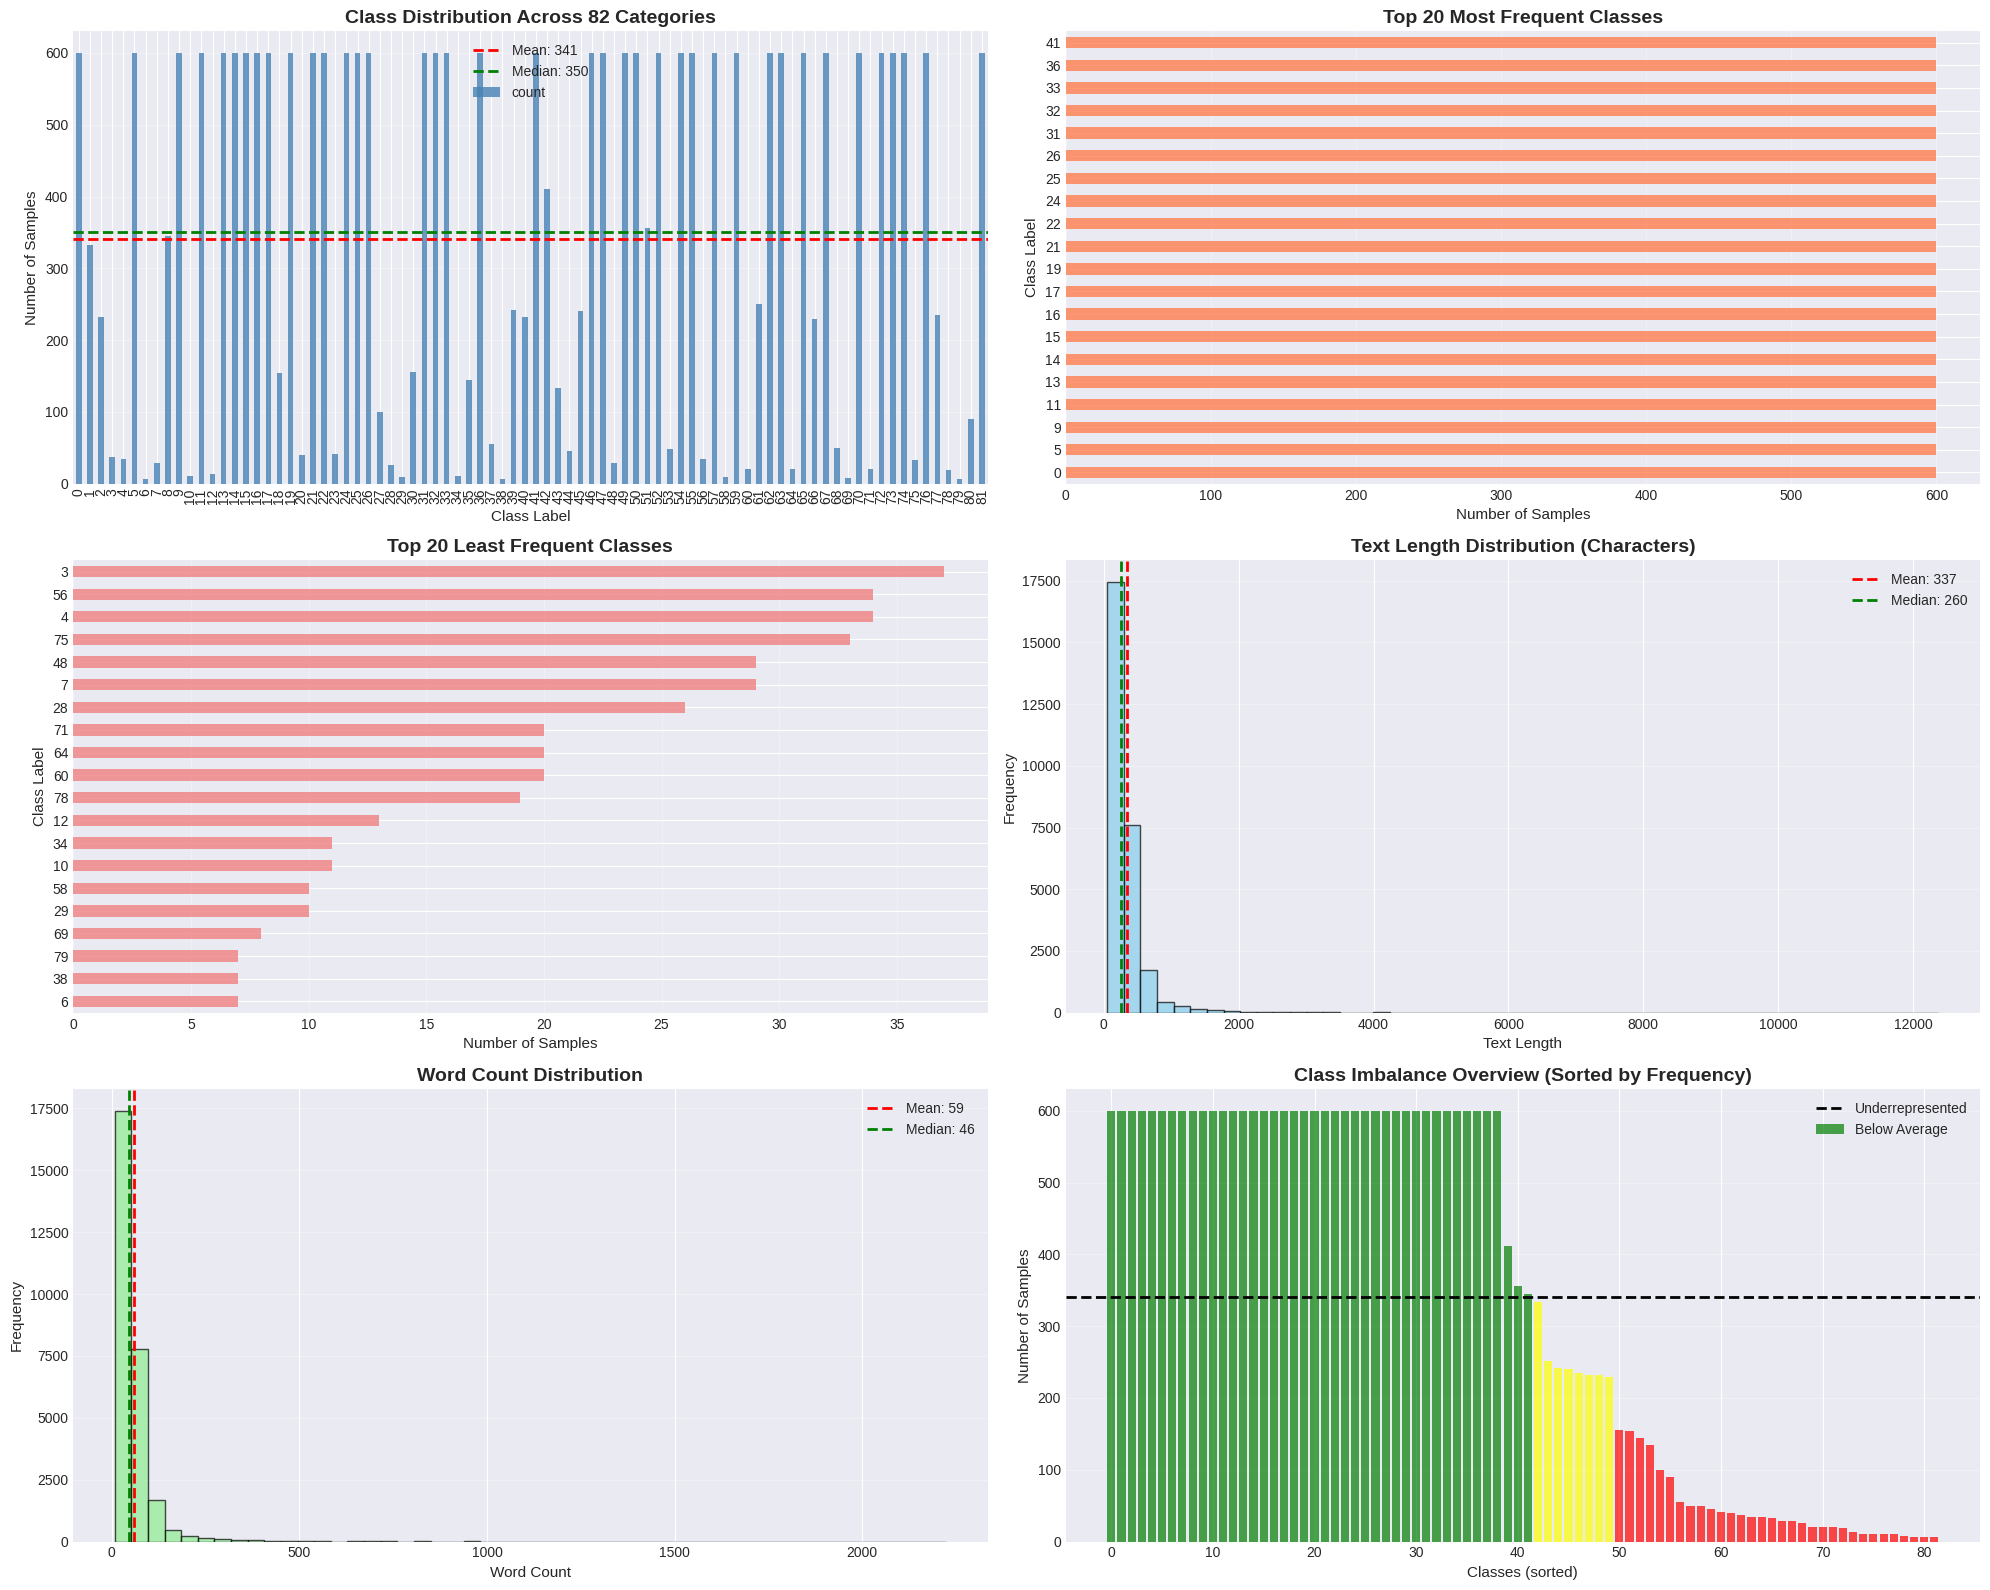

In [ ]:
# 8. VISUALIZATIONS

print("\n[8/8] Creating visualizations...")

# Create figure with subplots
fig = plt.figure(figsize=(20, 16))

# 1. Class Distribution
ax1 = plt.subplot(3, 2, 1)
label_counts.plot(kind='bar', color='steelblue', alpha=0.8, ax=ax1)
ax1.set_title('Class Distribution Across 82 Categories', fontsize=14, fontweight='bold')
ax1.set_xlabel('Class Label', fontsize=11)
ax1.set_ylabel('Number of Samples', fontsize=11)
ax1.axhline(y=label_counts.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {label_counts.mean():.0f}')
ax1.axhline(y=label_counts. median(), color='green', linestyle='--', linewidth=2, label=f'Median: {label_counts.median():.0f}')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 2. Top 20 Classes
ax2 = plt.subplot(3, 2, 2)
top_20 = label_counts.nlargest(20)
top_20.plot(kind='barh', color='coral', alpha=0.8, ax=ax2)
ax2.set_title('Top 20 Most Frequent Classes', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Samples', fontsize=11)
ax2.set_ylabel('Class Label', fontsize=11)
ax2.grid(axis='x', alpha=0.3)

# 3. Bottom 20 Classes
ax3 = plt.subplot(3, 2, 3)
bottom_20 = label_counts.nsmallest(20)
bottom_20.plot(kind='barh', color='lightcoral', alpha=0.8, ax=ax3)
ax3.set_title('Top 20 Least Frequent Classes', fontsize=14, fontweight='bold')
ax3.set_xlabel('Number of Samples', fontsize=11)
ax3.set_ylabel('Class Label', fontsize=11)
ax3.grid(axis='x', alpha=0.3)

# 4. Text Length Distribution
ax4 = plt.subplot(3, 2, 4)
ax4.hist(train_df['text_length'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
ax4.axvline(train_df['text_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train_df["text_length"].mean():.0f}')
ax4.axvline(train_df['text_length'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {train_df["text_length"].median():.0f}')
ax4.set_title('Text Length Distribution (Characters)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Text Length', fontsize=11)
ax4.set_ylabel('Frequency', fontsize=11)
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# 5. Word Count Distribution
ax5 = plt.subplot(3, 2, 5)
ax5.hist(train_df['word_count'], bins=50, color='lightgreen', alpha=0.7, edgecolor='black')
ax5.axvline(train_df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train_df["word_count"].mean():.0f}')
ax5.axvline(train_df['word_count'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {train_df["word_count"].median():.0f}')
ax5.set_title('Word Count Distribution', fontsize=14, fontweight='bold')
ax5.set_xlabel('Word Count', fontsize=11)
ax5.set_ylabel('Frequency', fontsize=11)
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# 6. Class Imbalance Visualization
ax6 = plt.subplot(3, 2, 6)
sorted_counts = label_counts.sort_values(ascending=False)
colors = ['red' if c < label_counts.mean()/2 else 'yellow' if c < label_counts.mean() else 'green' for c in sorted_counts]
ax6.bar(range(len(sorted_counts)), sorted_counts. values, color=colors, alpha=0.7)
ax6.set_title('Class Imbalance Overview (Sorted by Frequency)', fontsize=14, fontweight='bold')
ax6.set_xlabel('Classes (sorted)', fontsize=11)
ax6.set_ylabel('Number of Samples', fontsize=11)
ax6.axhline(y=label_counts.mean(), color='black', linestyle='--', linewidth=2, label='Mean')
ax6.legend(['Underrepresented', 'Below Average', 'Above Average', 'Mean'], loc='upper right')
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('eda_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Visualization saved as 'eda_analysis.png'")
plt.show()